# Vehicle Detection using Image Classification
This notebook uses a CNN model to classify images from a vehicle detection dataset.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsdincer/vehicle-detection-image-set")
print("Path to dataset files:", path)


100%|██████████| 119M/119M [00:00<00:00, 143MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/brsdincer/vehicle-detection-image-set/versions/1


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
img_height, img_width = 180, 180
batch_size = 32

# Load dataset using ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 14208 images belonging to 1 classes.
Found 3552 images belonging to 1 classes.


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model with fewer epochs
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=1  # Reduced to 1 epoch
)


444/444 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [6]:
# Evaluate model accuracy
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


111/111 ━━━━━━━━━━━━━━━━━━━━ 61s 546ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def predict_and_show(img_path, model, img_height, img_width, train_data):
    # Load and preprocess the image
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_height, img_width))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    class_labels = list(train_data.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Display the image
    plt.imshow(img_resized)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}")
    plt.show()

    # Output
    print(f"Predicted class: {predicted_class}")
    if "vehicle" in predicted_class.lower() or "car" in predicted_class.lower():
        print("✅ Vehicle detected in the image.")
    else:
        print("❌ No vehicle detected in the image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


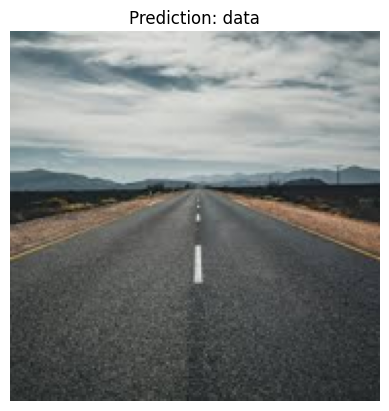

Predicted class: data
❌ No vehicle detected in the image.


In [16]:
image_path = "/content/images.jpg"
predict_and_show(image_path, model, img_height, img_width, train_data)
